In [ ]:
import PIL
import pathlib
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = pathlib.Path('/content/drive/MyDrive/GAIP_Project/ImageClassification/Clean/')

Mounted at /content/drive


In [ ]:
HP_batch_size = 32
HP_epochs = 25
HP_dropout = 0.4
HP_learning_rate = 0.001

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (32, 32),
  batch_size = HP_batch_size
)

Found 6058 files belonging to 2 classes.
Using 4847 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (32,32),
  batch_size = HP_batch_size
)

Found 6058 files belonging to 2 classes.
Using 1211 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape = (32, 32, 3)),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Dropout(HP_dropout),
  layers.Flatten(),
  layers.Dense(32, activation = 'relu'),
  layers.Dense(num_classes)
])

In [ ]:
optimizerFN = keras.optimizers.Adam(learning_rate=HP_learning_rate)

model.compile(optimizer = optimizerFN,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = HP_epochs,
    verbose = False
)

In [ ]:
_, accuracy = model.evaluate(train_ds,verbose=False)
print('Training Accuracy:', (accuracy * 100))
_, accuracy = model.evaluate(val_ds,verbose=False)
print('Test Accuracy:', (accuracy * 100))

Training Accuracy: 98.3701229095459
Test Accuracy: 88.68703842163086


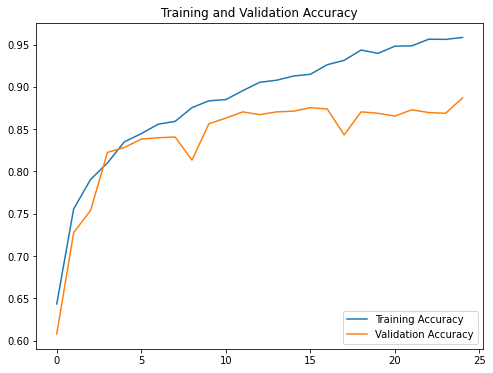

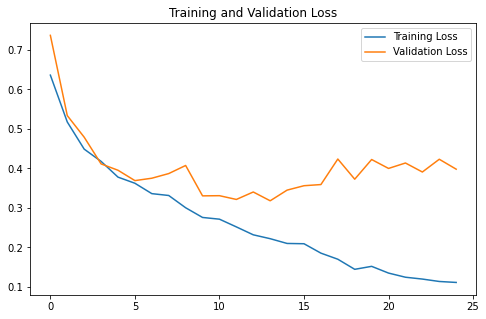

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(HP_epochs)

plt.figure(figsize=(8,6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure(figsize=(8,5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_preds=model.predict(val_ds)
test_preds=np.argmax(test_preds,axis=1)

In [ ]:
x_test = np.array([])
y_test = np.array([])
for x, y in val_ds:
    x_test = np.concatenate([x_test, np.argmax(model(x), axis=-1)])
    y_test = np.concatenate([y_test, y.numpy()])

In [ ]:
report = classification_report( y_test, test_preds)
print(report)
val_acc = accuracy_score(y_test,test_preds)
sns.heatmap(confusion_matrix(y_test,test_preds),annot=True)
val_acc

In [ ]:
#model.save("/content/drive/MyDrive/GAIP_Project/ImageClassification/image_model.h5", history)
print("Model Created")

Model Created
